# Titanic Disaster and Survival : Predictive Modelling
#### Basic exploratory data analysis of the different features in Titanic passenger dataset, and an attempt to visualize the relationship between those features and chances of survival is complete in a previous notebook. In this notebook, attempt is made to build machine learning models which should be able to (as accurately as possible) predict the chance of survival of individual pasengers based on multiple features.
### Solution Approch:
1. Read data - COMPLETE
2. Prepare data for analysis: Explore data - COMPLETE
3. Prepare data for analysis: Pre-process data - COMPLETE (Will be repeated here to clean up data)
4. Analyze data (through visualization) - COMPLETE
5. Build prediction model and predict outcomes on unseen data - Will be executed here
6. Report insights - Will be executed here

#### Original Dataset is available at: https://www.kaggle.com/c/titanic

#### Thank you for reading this notebook! The same is uploaded in Kaggle as well @ https://www.kaggle.com/supratimhaldar/titanic-disaster-and-survival-eda-and-prediction. Please share your thoughts, feedback and suggestions in the comments section, and upvote if you like this notebook :-)

## Section 1 : Read input data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap

# Set default fontsize and colors for graphs, and other variable
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'
RANDOM_STATE = 0
#np.random.seed(0)

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [2]:
# Read the input training and test data
train_data = pd.read_csv("C:\Study\DataSets\Titanic-Survival\\train.csv")
test_data = pd.read_csv("C:\Study\DataSets\Titanic-Survival\\test.csv")
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S


In [3]:
# Is there any empty data in training dataset?
train_data.isnull().sum()/train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [4]:
test_data.isnull().sum()/test_data.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

## Section 3 : Prepare data for analysis: Pre-process data

### Age : Fill missing data
Fill missing Age data based on Salutation/Title value

In [5]:
# Exract new feature as Salutation or Title
train_data["Salutation"] = train_data.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
test_data["Salutation"] = test_data.Name.str.split(',').str[1].str.split('.').str[0].str.strip()

In [6]:
# Apparently, there is only one passenger in train_data with Salaution as "Don" and 
# only one in test_data with salutation as "Dona". Let us replace both with "Mr." and "Mrs." respectively
train_data.Salutation = train_data.Salutation.replace('Don', 'Mr')
test_data.Salutation = test_data.Salutation.replace('Dona', 'Mrs')

In [7]:
# Concatenate/merge Salutation and Age data from train and test datasets
cols = ['Salutation', 'Age']
frames = train_data[cols], test_data[cols]
sal_age_merged = pd.concat(frames)
print("Number of unique Salutations in merged dataset:", sal_age_merged['Salutation'].unique().shape[0])
print("List of unique Salutations in merged dataset:", sal_age_merged['Salutation'].unique())

Number of unique Salutations in merged dataset: 16
List of unique Salutations in merged dataset: ['Mr' 'Mrs' 'Miss' 'Master' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady' 'Sir'
 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [8]:
# Fill missing Age values on train and test data based on Salutation
sal_age_merged_median = sal_age_merged.groupby("Salutation", as_index=True).Age.mean()
sal_age_merged_dict = sal_age_merged_median.to_dict()

train_data.Age = train_data.Age.fillna(train_data.Salutation.map(sal_age_merged_dict), axis=0)
test_data.Age = test_data.Age.fillna(test_data.Salutation.map(sal_age_merged_dict), axis=0)

print("Missing values in Age column now: in training data =", 
      train_data.Age.isnull().sum(), " and in test data =", 
      test_data.Age.isnull().sum())

Missing values in Age column now: in training data = 0  and in test data = 0


### AgeGroup : Add new feature
##### Categorize Age in bucket of 15 years

In [9]:
train_data['AgeGroup'] = train_data.Age // 15 * 15
test_data['AgeGroup'] = test_data.Age // 15 * 15

### Fare : Fill missing values (only in test dataset)

In [10]:
test_data.Fare = train_data.Age.fillna(train_data.Fare.mean(), axis=0)
print("Missing values in Fare column now: in test data =", test_data.Fare.isnull().sum())

Missing values in Fare column now: in test data = 0


### FareGroup : Add new feature
#### Categorize Fare in bucket of GBP 25

In [11]:
train_data['FareGroup'] = train_data.Fare // 25 * 25
test_data['FareGroup'] = test_data.Fare // 25 * 25

### Embarked : Fill missing data

In [12]:
train_data.Embarked = train_data.Embarked.fillna('S', axis=0)
print("Missing values in Embarked column now:", train_data.Embarked.isnull().sum())

Missing values in Embarked column now: 0


### CabinAvail : Add new feature 
#### CabinAvail = 1 if Cabin is not-null and CabinAvail = 0 if Cabin is null

In [13]:
train_data["CabinAvail"] = train_data["Cabin"].notnull().astype('int')
test_data["CabinAvail"] = test_data["Cabin"].notnull().astype('int')

### FamilySize : Add new feature
#### Sum of SibSp and Parch

In [14]:
train_data['FamilySize'] = train_data.SibSp + train_data.Parch
test_data['FamilySize'] = test_data.SibSp + test_data.Parch

## Section 5 : Build prediction model and predict outcomes on unseen data

### Fearture to be considered for modelling:
* Sex (categorical)
* Pclass (categorical)
* FamilySize (categorical)
* CabinAvail (categorical)
* Embarked (categorical)
* Salutation (categorical)
* Age (continuous)
* Fare (continuous)

#### All features with categorical data will be encoded, and continous features will be scaled (for certain models)

In [15]:
# Seggregate features and target
#features_continuous = ['Fare', 'Age']
features_continuous = []
features_categorical = ['Sex', 'Pclass', 'FamilySize', 'CabinAvail', 'Embarked', 'AgeGroup', 'Salutation', 'FareGroup']

features_X = features_continuous + features_categorical
train_X = train_data[features_X]
train_y = train_data['Survived']
print('Size of train data set:', train_X.shape, train_y.shape)
train_X.head()

Size of train data set: (891, 8) (891,)


,Sex,Pclass,FamilySize,CabinAvail,Embarked,AgeGroup,Salutation,FareGroup
0,male,3,1,0,S,15.0,Mr,0.0
1,female,1,1,1,C,30.0,Mrs,50.0
2,female,3,0,0,S,15.0,Miss,0.0
3,female,1,1,1,S,30.0,Mrs,50.0
4,male,3,0,0,S,30.0,Mr,0.0


### Perform Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
features_scaled = ['Age', 'Fare']
#train_X_scaled = scalar.fit_transform(train_X[features_scaled].astype(np.float64))

In [17]:
train_X = pd.DataFrame({'Sex':['male', 'female']*3, 'AgeGroup':[0,15,30,45,60,75]})
train_X

,Sex,AgeGroup
0,male,0
1,female,15
2,male,30
3,female,45
4,male,60
5,female,75


### Perform Hot Encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
train_X_encoded = encoder.fit_transform(train_X[['Sex', 'AgeGroup']])
encoder.get_feature_names()

array(['x0_female', 'x0_male', 'x1_0', 'x1_15', 'x1_30', 'x1_45', 'x1_60',
       'x1_75'], dtype=object)

In [112]:
train_X = pd.get_dummies((train_X[features_categorical]).astype(str))
train_X.head()

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,FamilySize_0,FamilySize_1,FamilySize_10,FamilySize_2,FamilySize_3,...,FareGroup_100.0,FareGroup_125.0,FareGroup_150.0,FareGroup_200.0,FareGroup_225.0,FareGroup_25.0,FareGroup_250.0,FareGroup_50.0,FareGroup_500.0,FareGroup_75.0
0,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create a Pipeline

In [113]:
# Create a Pipeline
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    #("cont_std_scale", StandardScaler(), features_continuous),
    #("cate_hot_encode", OneHotEncoder(), features_categorical),
     ("cate_dummies", "passthrough", train_X.columns)
    ])

train_X_prepared = full_pipeline.fit_transform(train_X)

### Models

#### Utility Functions

In [114]:
# Check CV accuracy
from sklearn.model_selection import cross_val_score
def checkCrossValAccuracy(model, X=train_X_prepared, y=train_y, cv=3, scoring="accuracy"):
    cv_score = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    print("CV Accuracy =", cv_score)
    print("CV Accuracy Mean =", cv_score.mean())
    return cv_score

#### Prepare classification models

In [115]:
from sklearn.svm import LinearSVC
linsvc_clf = LinearSVC()

from sklearn.svm import SVC
svc_clf = SVC()

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()

from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier()

#### Test the above classification models

LinearSVC : 0.8226644423851873
SVC : 0.795666126554949
SGDClassifier : 0.7846128448709069
LogisticRegression : 0.8238132880249467
DecisionTreeClassifier : 0.7845811048848725
RandomForestClassifier : 0.7991819240247579
KNeighborsClassifier : 0.8126462388825824
MLPClassifier : 0.8025526396142688


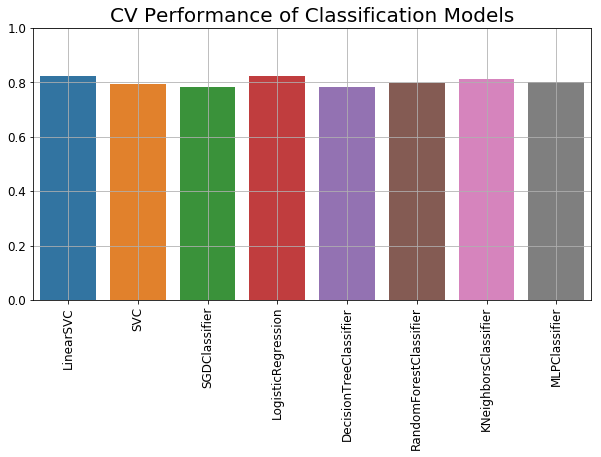

In [116]:
model_name, model_score = [], []
models = [linsvc_clf, svc_clf, sgd_clf, logreg_clf, tree_clf, forest_clf, knn_clf, mlp_clf]
for _clf_model in models:
    cv_score = cross_val_score(_clf_model, train_X_prepared, train_y, cv=5, scoring='accuracy')
    print(_clf_model.__class__.__name__,  ":", cv_score.mean())
    model_name.append(_clf_model.__class__.__name__)
    model_score.append(cv_score.mean())


# Plot the data
fig, axes = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=model_name, y=model_score, ci=None, ax = axes)
axes.set_xticklabels(model_name, rotation=90)
axes.set_ylim(0,1)
axes.set_title('CV Performance of Classification Models')
axes.grid(True)
plt.show()

#### Ensemble - Hard Voting Classifier

In [45]:
from sklearn.ensemble import VotingClassifier
logreg_clf = LogisticRegression(C=0.5, max_iter=500, solver='newton-cg')

estimators=[('linsvc_clf', linsvc_clf), ('svc_clf', svc_clf), ('sgd_clf', sgd_clf), 
            ('logreg_clf', logreg_clf), ('tree_clf', tree_clf), ('forest_clf', forest_clf),
            ('knn_clf', knn_clf), ('mlp_clf', mlp_clf)]

voting_hard_clf = VotingClassifier(estimators=estimators, voting='hard')
voting_hard_clf.fit(train_X_prepared, train_y)

voting_hard_cv_score = checkCrossValAccuracy(voting_hard_clf, X=train_X_prepared)

CV Accuracy = [0.80446927 0.81005587 0.81460674 0.79775281 0.84745763]
CV Accuracy Mean = 0.8148684634690493


#### Ensemble - Soft Voting Classifier

In [46]:
from sklearn.ensemble import VotingClassifier

svc_clf_proba = SVC(probability=True)
sgd_clf = SGDClassifier(loss='log')

estimators=[('svc_clf_proba', svc_clf_proba), ('sgd_clf', sgd_clf), 
            ('logreg_clf', logreg_clf), ('tree_clf', tree_clf), ('forest_clf', forest_clf),
            ('knn_clf', knn_clf), ('mlp_clf', mlp_clf)]

voting_soft_clf = VotingClassifier(estimators=estimators, voting='soft')
voting_soft_clf.fit(train_X_prepared, train_y)

voting_soft_cv_score = checkCrossValAccuracy(voting_soft_clf, X=train_X_prepared)

CV Accuracy = [0.81005587 0.81005587 0.82022472 0.79775281 0.83615819]
CV Accuracy Mean = 0.8148494904047716


#### Ensemble - Gradient Boost

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

gdb_clf = GradientBoostingClassifier(learning_rate=0.1, loss='deviance',
                                     max_depth=2, max_features=0.2)
gdb_clf.fit(train_X_prepared, train_y)

gdb_cv_score = checkCrossValAccuracy(gdb_clf, X=train_X_prepared)

CV Accuracy = [0.81144781 0.83164983 0.81481481]
CV Accuracy Mean = 0.819304152637486


In [118]:
#cat_one_hot_attribs = list(encoder.classes_)
#sorted(zip(gdb_clf.feature_importances_, full_pipeline.get_feature_names()), reverse=True)
sorted(zip(gdb_clf.feature_importances_, train_X.columns), reverse=True)

[(0.28664510366574986, 'Salutation_Mr'),
 (0.13968380359123356, 'Sex_male'),
 (0.10993702598330347, 'Sex_female'),
 (0.10608329340178832, 'Pclass_3'),
 (0.0749553525250244, 'CabinAvail_0'),
 (0.03070487071052797, 'CabinAvail_1'),
 (0.024050970201328317, 'Pclass_1'),
 (0.022885641816312693, 'Salutation_Master'),
 (0.022158186034114825, 'Salutation_Mrs'),
 (0.020037627127960318, 'FamilySize_4'),
 (0.0195491129366961, 'FamilySize_5'),
 (0.011353774270634547, 'FamilySize_2'),
 (0.010757070055068839, 'Pclass_2'),
 (0.009550695454053841, 'FamilySize_10'),
 (0.009183991857762377, 'Embarked_S'),
 (0.009131303024428711, 'FareGroup_0.0'),
 (0.00891002462290142, 'FareGroup_25.0'),
 (0.008620445581829013, 'Salutation_Rev'),
 (0.008119504267226177, 'Embarked_C'),
 (0.007823569049834769, 'AgeGroup_15.0'),
 (0.007722224644979409, 'FamilySize_7'),
 (0.007384239825478645, 'AgeGroup_0.0'),
 (0.006040706382255037, 'Salutation_Miss'),
 (0.004894625929290741, 'AgeGroup_45.0'),
 (0.00452261442953466, 'FareG

#### Ensemble - Bagging

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        LogisticRegression(), n_estimators=1000,
        max_samples=1.0, bootstrap=True)
bag_clf.fit(train_X_prepared, train_y)

bagging_cv_score = checkCrossValAccuracy(bag_clf, X=train_X_prepared)

CV Accuracy = [0.82681564 0.82681564 0.80337079 0.81460674 0.84180791]
CV Accuracy Mean = 0.8226833445221218


#### Ensemble - Pasting

In [52]:
from sklearn.ensemble import BaggingClassifier

pas_clf = BaggingClassifier(
        LogisticRegression(), n_estimators=500,
        max_samples=1.0, bootstrap=False)
pas_clf.fit(train_X_prepared, train_y)

pasting_cv_score = checkCrossValAccuracy(pas_clf, X=train_X_prepared)

CV Accuracy = [0.82681564 0.82681564 0.80337079 0.81460674 0.84745763]
CV Accuracy Mean = 0.8238132880249467


In [53]:
# GridSearchCV to find optimal parameters on GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'learning_rate': [0.01, 0.03, 0.1, 0.3], 'max_features': [0.2, 0.5, 0.8, 1.0],
               'loss': ['deviance', 'exponential'], 'max_depth': [2, 5, 10, 20]
              }]

gdb_gs_clf = GradientBoostingClassifier()
grid_search = GridSearchCV(gdb_gs_clf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train_X_prepared, train_y)

print("grid_search.best_params_ =", grid_search.best_params_)
print("grid_search.best_score_ =", grid_search.best_score_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min


grid_search.best_params_ = {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'max_features': 0.2}
grid_search.best_score_ = 0.8294051627384961


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.8min finished


In [54]:
# GridSearchCV to find optimal parameters on LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [{'fit_intercept': [True, False],
              # 'max_iter': [100, 500, 1000, 5000, 10000],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'C': [1.0, 0.5, 0.1, 2.0],
              }]

logreg_gs_clf = LogisticRegression()
grid_search = GridSearchCV(logreg_gs_clf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train_X_prepared, train_y)

print("grid_search.best_params_ =", grid_search.best_params_)
print("grid_search.best_score_ =", grid_search.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 193 out of 200 | elapsed:    4.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.1s finished


grid_search.best_params_ = {'C': 1.0, 'fit_intercept': True, 'solver': 'newton-cg'}
grid_search.best_score_ = 0.8237934904601572


### Prepare submission file for Kaggle test data

In [109]:
# Length of test dataset 
test_data_m = test_data.shape[0]

# Submission output path
submission_out_path = os.path.join("C:\Study\DataSets\\Titanic-Survival", 
                                   "Submission_04Feb19_gdb_clf.csv")

# Transform test data
test_X_prepared = full_pipeline.transform(test_data)

# ============================
# Change the clf model below
# ============================
test_prediction = gdb_clf.predict(test_X_prepared)

my_submission = pd.DataFrame({ \
            'PassengerId': test_data.PassengerId, \
            'Survived': test_prediction})
my_submission.to_csv(submission_out_path, index=False)